# 泰坦尼克号数据分析

1.载入文档

2.分析仓位与存活率的相关性 - 成功

3.分析性别与存活率的相关性 - 成功

4.分析年龄与存活率的相关性 - 作图失败

5.分析船上兄弟多寡与存活率的相关性 - 成功

6.分析船上直系亲属多寡与存活率的相关性 - 未有信服结论

7.分析船票号码与存活率的相关性 - 未开始分析

8.分析票价与存活率的相关性 - 作图失败

9.分析仓号码与存活率的相关性 - 未开始分析

10.分析上船港口与存活率的相关性 - 成功

## 1.载入文档

In [4]:
%matplotlib inline
# 如果不添加这句，是无法直接在jupyter里看到图的

# 导入所有需要的包盒函数
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import statsmodels as sm

In [5]:
# 文档地址

#Series([1,3,5,np.nan,6,8])
#trip_data = pd.read_csv('https://github.com/ShiChJ/DAND-Basic-Materials/blob/master/P2/Project_Files/titanic-data.csv')
trip_data = pd.read_csv('titanic-data.csv')
trip_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.分析仓位与存活率的相关性

In [6]:
pclass = pd.crosstab(trip_data['Pclass'] , trip_data['Survived'])
pclass

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [9]:
# 得到百分比
pclass_pcts = pclass.div(pclass.sum(1), axis=0)
pclass_pcts

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


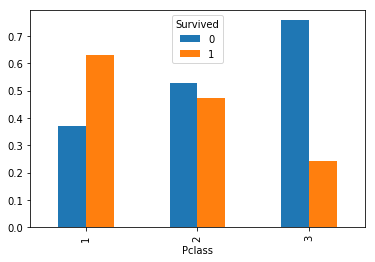

In [10]:
pclass_pcts.plot.bar()

### 结论：
1.1等舱的船客能活下来，选它的存活率为63%，远高于其他两仓

2.3等舱死亡率为76%，基本就是个死了

## 3.分析性别与存活率的相关性

In [11]:
sex = pd.crosstab(trip_data['Sex'] , trip_data['Survived'])
sex

Survived,0,1
Sex,,
female,81,233
male,468,109


In [12]:
# 得到百分比
sex_pcts = sex.div(sex.sum(1), axis=0)
sex_pcts

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


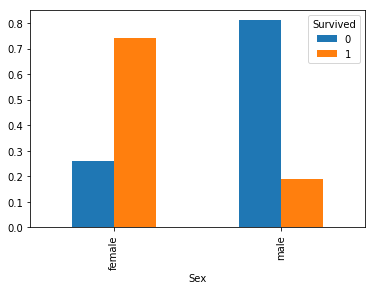

In [13]:
sex_pcts.plot.bar()

## 结论：
1.女性的存活率为74%，比一等舱的船客存活率还高

2.男性的死亡率为81%，比三等舱的船客存活率还高

3.从这个数据可以看到，“让女性先走”的确不是一句空话

## 4.分析年龄与存活率的相关性

In [24]:
age = pd.crosstab(trip_data['Age'], trip_data['Survived'] )
age.head()

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3


In [21]:
# 得到百分比
age_pcts = age.div(age.sum(1), axis=0)
age_pcts[1].head()

Age
0.42    1.0
0.67    1.0
0.75    1.0
0.83    1.0
0.92    1.0
Name: 1, dtype: float64

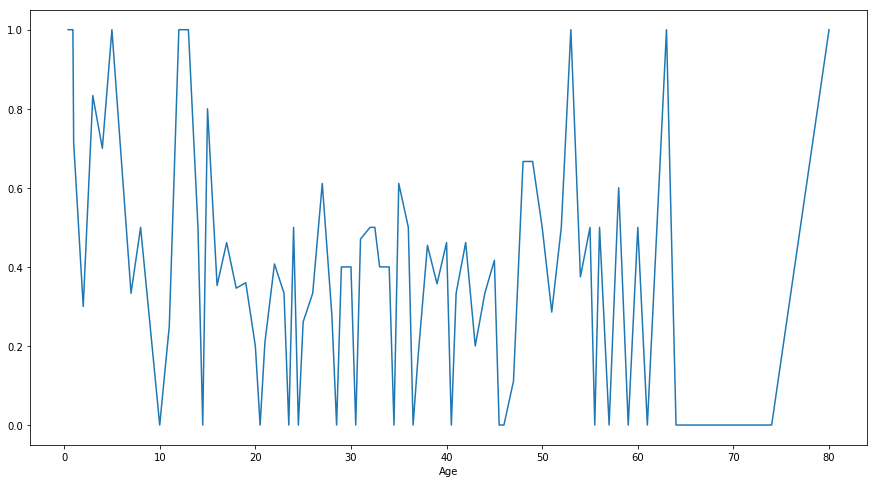

In [20]:
age_pcts[1].plot(figsize=(15, 8))

我想做一个表现趋势的条形图，间隔为十岁，但是不会做，请指教～谢谢～

## 5.分析船上兄弟多寡与存活率的相关性

In [27]:
sibsp = pd.crosstab(trip_data['SibSp'], trip_data['Survived'] )
sibsp.head()

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3


In [28]:
# 得到百分比
sibsp_pcts = sibsp.div(sibsp.sum(1), axis=0)
sibsp_pcts

Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,0.000000
8,1.000000,0.000000


In [38]:
sibsp_pcts.iloc[:5]

Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667


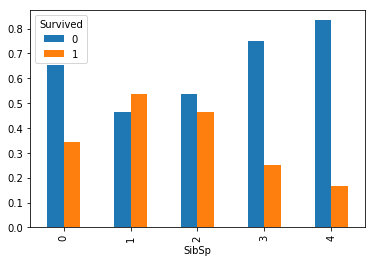

In [40]:
sibsp_pcts.iloc[:5].plot.bar()

## 结论：
1.有一个兄弟的乘客存活率最高，其次是有2个兄弟的

2.乘客最多有4个兄弟姐妹陪伴，但是死亡率同样最高

3.为什么会出现这个现象，推测是乘客兄弟越多，年纪就可能越大，死亡率也越高

## 6.分析船上直系亲属多寡与存活率的相关性

In [45]:
parch = pd.crosstab(trip_data['Parch'], trip_data['Survived'] )
parch

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [44]:
# 得到百分比
parch_pcts = parch.div(parch.sum(1), axis=0)
parch_pcts

Survived,0,1
Parch,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.400000,0.600000
4,1.000000,0.000000
5,0.800000,0.200000
6,1.000000,0.000000


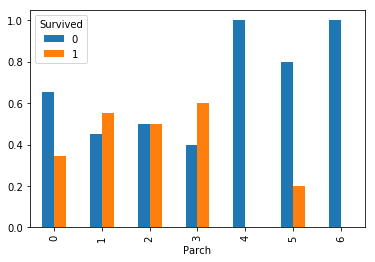

In [46]:
parch_pcts.plot.bar()

## 结论：
1.有1-3个家人陪伴的存活率稍高一些，但是由于样本不够，数据不是特别清晰

## 10.分析上船港口与存活率的相关性

In [123]:
Embarked = pd.crosstab(trip_data['Embarked'] , trip_data['Survived'])
Embarked 

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [125]:
# 得到百分比
Embarked_pcts = Embarked.div(Embarked.sum(1), axis=0)
Embarked_pcts

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


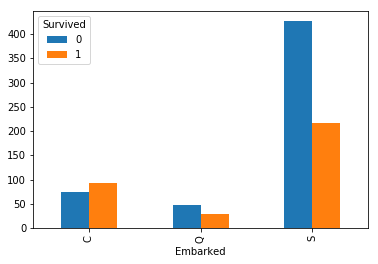

In [126]:
Embarked.plot.bar()

## 结论：
1.C港口的存活率稍高于死亡率，成为3港口中存活率最高的港口，推测是因为这个港口的乘客多为1等舱

2.S和Q港口的死亡率都超过60%，比较危险